# FuzzyART com a base de dados Iris

FuzzyART é o modelo ART mais usado.

## Importando bibliotecas e baixando base de dados

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from artlib import FuzzyART

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


## Inicialização do modelo, normalização e preparação dos dados

<font color="#6fa849ff">**Entendendo os parâmetros**</font> 

- Beta ($\beta$): Fica no intervalo (0,1] e é o parâmetro de aprendizado. Quando $\beta = 1$, dizemos que o modelo está no modo de aprendizado rápido.

- Rho ($\rho$): Parâmetro de vigilância. Se $M_j(x) < \rho$, a categoria é rejeitada. 
    - Obs.: $M_j$ é a função "match", $M_j(x)$ mede o quanto uma entrada x é coberta pela categoria j.

- Alpha ($\alpha$): Parâmetro de escolha, controla a divisão por zero.

<font color="red">Fazer:</font> Testar a mesma tarefa com diferentes valores de rho, alpha e beta


In [17]:
model = FuzzyART(rho=0.7, alpha = 0.0, beta = 1.0)

Agora, determinaremos os limites que serão utilizados. Juntaremos todos os dados (treino e teste) e deixaremos o modelo calcular os limites de forma automática.

<font color="red">Dúvida:</font>
O README da biblioteca ARTlib diz: "Se o primeiro lote ("batch") dos seus dados de treinamento for representativo de todo o espaço de dados você não precisa fazer nada e a artlib vai identificar os limites dos dadso automaticamente." 

Nesse caso, como todos os dados que são utilizados já estão em X, acredito que essa normalização não é necessária.

In [ ]:
lower_bound, upper_bound = model.find_data_bounds(X)
model.set_data_bounds(lower_bound, upper_bound)

In [19]:
train_X_prep = model.prepare_data(X_train)
test_X_prep = model.prepare_data(X_test)

# Fazendo o "fit" , predições e gráficos

In [20]:
# Fit the model
model.fit(train_X_prep)

# Predict data labels
predictions = model.predict(test_X_prep)

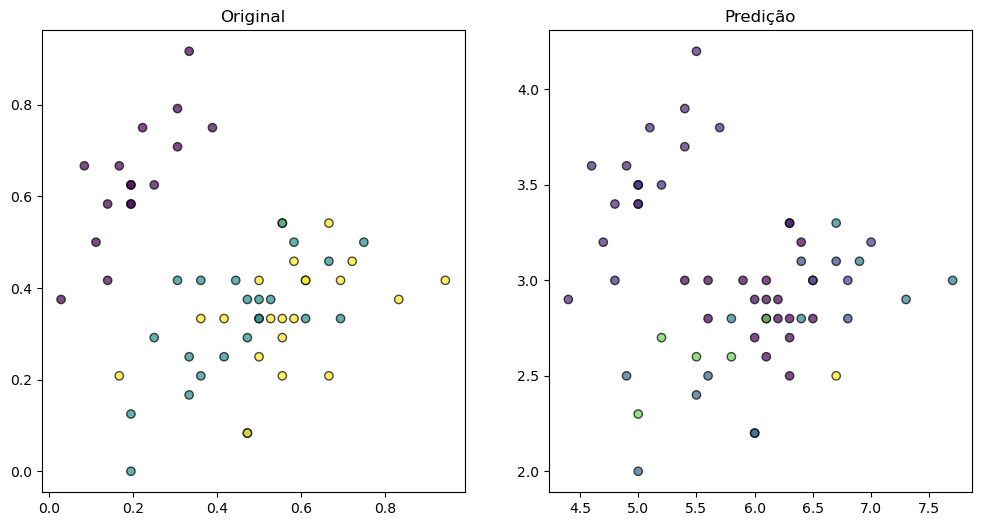

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2]
[4 3 1 4 1 4 1 2 2 0 0 0 7 0 0 1 0 7 1 1 0 0 1 1 0 1 1 0 7 1 2 0 1 0 4 7 1
 0 0 7 2 1 4 1 1 3 2 4 3 9 3 4 0 3 0 0 3 0 2 2]


In [22]:
f, subplots = plt.subplots(1, 2, figsize=(12, 6))

subplots[0].scatter(
    test_X_prep[:, 0],
    test_X_prep[:, 1],  # coordenadas x e y
    c=y_test,  # cor de acordo com a classe (0 ou 1)
    edgecolors="k",  # contorno preto em cada ponto
    alpha=0.7,
)
subplots[0].set_title("Original")
subplots[1].scatter(
    X_test[:, 0],
    X_test[:, 1],  # coordenadas x e y
    c=predictions,  # cor de acordo com a classe (0 ou 1)
    edgecolors="k",  # contorno preto em cada ponto
    alpha=0.7,
)
subplots[1].set_title("Predição")
plt.show()
print(y_test)
print(predictions)